In [1]:
import numpy as np
import pandas as pd
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt

In [2]:
# 导入数据
df = pd.read_csv('boston.csv')
data = df.values

In [3]:
# Normalization
def feature_normalize(X):
    mu = np.mean(X, axis = 0)  
    sigma = np.std(X, axis= 0, ddof = 1)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma
data, mu, sigma = feature_normalize(data)

In [4]:
# 增加偏置列
def add_bias(X):
    bias = np.ones(X.shape[0])
    bias = bias.reshape(X.shape[0],1)
    return np.hstack([bias, X])
X = data[:, 0:13]
y = data[:, 13:]
X = add_bias(X)

In [5]:
# 划分数据集
train_ind = int(len(X)*0.6)
X_train = X[:train_ind]
y_train = y[:train_ind]
X_test = X[train_ind:]
y_test = y[train_ind:]
print('shape of X:', X_train.shape, X_test.shape)
print('shape of y:', y_train.shape, y_test.shape)

shape of X: (303, 14) (203, 14)
shape of y: (303, 1) (203, 1)


In [6]:
# Compute Cost
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    #J = 1 / (2 * m) * np.sum(sqrErrors)
    J = 1/(2 * len(X)) * errors.T.dot(errors)
    return J

In [9]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / X.shape[0]) * X.transpose().dot(errors);
        #print('sum_delta= ', sum_delta[:5])
        theta = theta - sum_delta;

        cost_history[i] = compute_cost(X, y, theta)  

    return theta, cost_history

Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

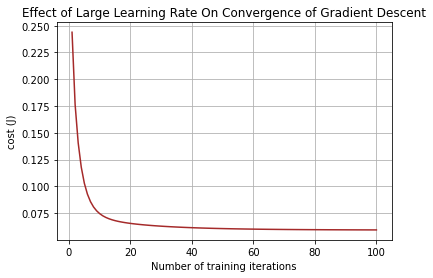

In [10]:
iterations = 100;
theta = np.zeros(14)
theta = theta.reshape(14,1)
alpha = 0.15;

theta_6, cost_history_6 = gradient_descent(X_train, y_train, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of training iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")

In [11]:
# 模型评估
y_hat_train = X_train.dot(theta_6)
y_hat_test = X_test.dot(theta_6)
mse = np.sum(np.power(y_hat_test-y_test,2))/(len(X_test))
rmse = np.sqrt(mse)
R2_train = 1 - np.sum(np.power(y_hat_train - y_train,2))/np.sum(np.power(np.mean(y_train) - y_train,2))
R2_test = 1 - np.sum(np.power(y_hat_test - y_test,2))/np.sum(np.power(np.mean(y_test) - y_test,2))
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2_train = ', R2_train)
print('R2_test = ', R2_test)

MSE =  0.733850585682502
RMSE =  0.8566507956469206
R2_train =  0.8714975866209872
R2_test =  -0.003894813818281717


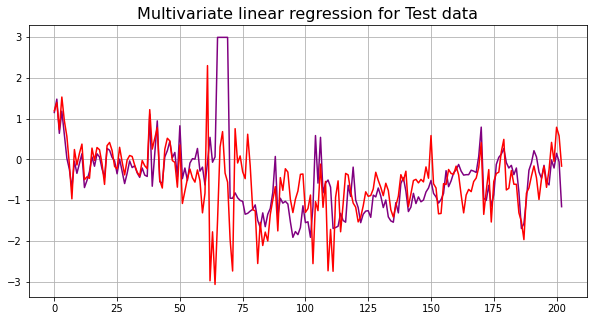

In [12]:
plt.figure(figsize=(10,5))
plt.title('Multivariate linear regression for Test data',fontsize=16)
plt.grid(True)
plt.plot(y_test , color='purple')
plt.plot(y_hat_test , color='red'  )
plt.show()